# Matematikai Algoritmusok és Felfedezések II.

## 7. Geometrai algoritmusok

### 2023 április 18.

In [57]:
import numpy as np
from matplotlib import pyplot as plt # for plotting
from random import randint # for sorting and creating data pts
from math import atan2 # for computing polar angle
import math
from manim import *

#### Motiváció

Néhány felhasználási terület:

- Számítógépes grafika
- Robotika
- GIS (Geographic information system) Földrajzi adatok
- Computer aided design (CAD) Számítógépes tervezés. Pl lézervágás, nyomtatás 
- Biológiai modellezés  molecular modeling
- Önvezető autók

A bonyolultabb geometriai feladatok általában egyszerűbb elemekből építkeznek:

- Objektumok metszetének kiszámítása
- Három pont egy egyenesen van-e?
- Konvex burok számítása 
- Több térkép (szakasz rendszer) egyesítése 
- Hatékony geometriai adatstruktúra építése
- Útkeresés geometriai környezetben
- Voronoi diagram, Delaunay háromszögelés 


Különleges hibalehetőségek lépnek elő
-  Degenerált esetek
-  Számítási hibák




## Példa: Konvex burok kiszámítása
## Graham scan algoritmus

<img src="burok.png" alt="burok" style="width: 600px;"/>

Triviális ötlet: Minden pontpárra nézzük meg, hogy a szélén van-e. 

Futásidő: $O(n^3)$

Hogyan nézzük, hogy a szélén van-e?

Determináns számítással!



In [2]:
# 	[p1(x) p1(y) 1]
#	[p2(x) p2(y) 1]
# 	[p3(x) p3(y) 1]
# Ha >0 pozitív körüljárás (p3 a p1p2 vektor bal oldalán van)
# Ha <0 negatív körüljárás
# Ha =0 kollineáris
def det(p1,p2,p3):
    return   (p2[0]-p1[0])*(p3[1]-p1[1])-(p2[1]-p1[1])*(p3[0]-p1[0])



### Graham scan algoritmus

- Keressük meg a legkisebb $y$ koordinátájú $p$ pontot, innen indulunk. Ez biztosan a konvex burkon van. 
- $p$ ből körbenézve rendezzük a pontokat szög szerint
- A rendezés szerint végigmegyünk a pontokon. Az adott pontot mindig hozzávesszük a burokhoz. Ha egy "rosz irányú" törés jön létre a burkon akkor töröljük az ott lévő pontot a burkunkról. 

<img src="order.png" alt="burok" style="width: 400px;"/>



### Futásidő elemzés

- $y$ szerinti minimum: $O(n)$
- Rendezés: $O(n\log(n))$
- Burok felépítése: $O(n)$. Minden pontot legfeljebb egyszer dobunk ki!


Lehetne-e jobb a futásidő?

Nem, mivel a konvex burok használható rendezésre, és azt nem lehet kevesebből.

De mégis! Ha a konvex burok mérete $h$ akkor létezik $n\log(h)$ algoritmus. (Chan's algorithm)

### Megvalósítás 

In [45]:
num_of_points=20
x_cord=7*np.random.rand(num_of_points)-3.5
y_cord=7*np.random.rand(num_of_points)-3.5
points=list(zip(x_cord,y_cord))
points

[(-1.178986050725273, 1.7001538743319182),
 (1.1836153379743575, -1.1939347232641828),
 (2.9129111666948555, 0.8299968196708996),
 (-1.2495232273606005, 0.934033038422311),
 (-0.8490446188358427, 1.4696842325896),
 (3.3745482029288567, -0.2624158378843262),
 (0.36144213759862165, 2.624333125869401),
 (0.6444603137476896, 1.557694120757077),
 (-2.4353424591011166, -0.31696543186338166),
 (-1.8261715724333674, -0.7886732815682564),
 (-2.7028361859735877, 3.239044237071652),
 (-0.04776764002789502, -2.351151799806216),
 (-0.9884543439948943, -2.8151827312983686),
 (0.3782362418323091, -2.1038252931499413),
 (2.008663608661739, 2.233114913320839),
 (-2.5450074862236916, 1.4495958629794856),
 (2.685156889215672, -3.0168939847819702),
 (1.9813375391333512, -0.3172078475356641),
 (1.0341536603380108, 0.09748650885830568),
 (-0.8999289681634903, -2.3365773082739274)]

In [28]:
def polar_angle(p0,p1=None):
    if p1==None: p1=anchor
    y_span=p0[1]-p1[1]
    x_span=p0[0]-p1[0]
    return atan2(y_span,x_span)

In [29]:
# Returns the euclidean distance from p0 to p1,
# square root is not applied for sake of speed.
# If p1 is None, defaults to replacing it with the
# global variable 'anchor', normally set in the 
# 'graham_scan' function.
def distance(p0,p1=None):
    if p1==None: 
        p1=anchor
    y_span=p0[1]-p1[1]
    x_span=p0[0]-p1[0]
    return y_span**2 + x_span**2

In [30]:
# Returns the determinant of the 3x3 matrix...
# 	[p1(x) p1(y) 1]
#	[p2(x) p2(y) 1]
# 	[p3(x) p3(y) 1]
# If >0 then counter-clockwise
# If <0 then clockwise
# If =0 then collinear
def det(p1,p2,p3):
    return   (p2[0]-p1[0])*(p3[1]-p1[1])-(p2[1]-p1[1])*(p3[0]-p1[0])

In [31]:
# Sorts in order of increasing polar angle from 'anchor' point.
# 'anchor' variable is assumed to be global, set from within 'graham_scan'.
# For any values with equal polar angles, a second sort is applied to
# ensure increasing distance from the 'anchor' point.
def quicksort(a):
    if len(a)<=1: return a
    smaller,equal,larger=[],[],[]
    piv_ang=polar_angle(a[randint(0,len(a)-1)]) # select random pivot
    for pt in a:
        pt_ang=polar_angle(pt) # calculate current point angle
        if   pt_ang<piv_ang:  smaller.append(pt)
        elif pt_ang==piv_ang: equal.append(pt)
        else: 				  larger.append(pt)
    return   quicksort(smaller)+sorted(equal,key=distance)+quicksort(larger)

In [49]:
# Returns the vertices comprising the boundaries of
# convex hull containing all points in the input set. 
# The input 'points' is a list of (x,y) coordinates.
def graham_scan(points,show_progress=False):
    hlista=[]  #ez csak a rajzoláshoz használom 
    global anchor # to be set, (x,y) with smallest y value

    # Find the (x,y) point with the lowest y value,
    # along with its index in the 'points' list. If
    # there are multiple points with the same y value,
    # choose the one with smallest x.
    min_idx=None
    for i,(x,y) in enumerate(points):
        if min_idx==None or y<points[min_idx][1]:
            min_idx=i
        if y==points[min_idx][1] and x<points[min_idx][0]:
            min_idx=i

    # set the global variable 'anchor', used by the
    # 'polar_angle' and 'distance' functions
    anchor=points[min_idx]

    # sort the points by polar angle then delete 
    # the anchor from the sorted list
    sorted_pts=quicksort(points)
    del sorted_pts[sorted_pts.index(anchor)]

    # anchor and point with smallest polar angle will always be on hull
    hull=[anchor,sorted_pts[0]]
    for s in sorted_pts[1:]:
        while det(hull[-2],hull[-1],s)<=0: #amíg rossz irányba kanyarodik a vége törülünk.

            del hull[-1] # backtrack
            
        hull.append(s)
       
    return hull

# For each size in the 'sizes' list, compute the average


In [50]:
ch=graham_scan(points,False)
print(ch)

[(2.685156889215672, -3.0168939847819702), (3.3745482029288567, -0.2624158378843262), (2.9129111666948555, 0.8299968196708996), (2.008663608661739, 2.233114913320839), (0.36144213759862165, 2.624333125869401), (-2.7028361859735877, 3.239044237071652), (-2.4353424591011166, -0.31696543186338166), (-0.9884543439948943, -2.8151827312983686)]


In [43]:
## Hibalehetőségek

points=[(0,0),(-1,0),(1,0),(1,1),(2,1),(2,2)]
ch=graham_scan(points,True)
print(ch)

IndexError: list index out of range

# Rajzolás



Euclidean minimum spanning tree## Vektor grafikus vs raszteres képek

<img src="http://vector-conversions.com/images/raster_vs_vector.jpg" alt="Drawing" style="width: 600px;"/>


Raszteres
 
 - Nem lehet nagyítani
 - Van amikor, elkerülhetetlen, pl fotók
 - Hatékonyabb bonyolult képek esetén
 - Elterjedtebb
 - Nehéz vektorossá konvertálni

Vektoros
 
 - Matekos gondolkodáshoz közelebb van
 - Hatékonyabb egyszerű képek esetén, 
 - Kicsi kép méret nagy méretű kép esetén is
 - Tetszőlegesen nagyítható
 - Könnyű raszteressé konvertálni


# Animációk

<img src="keyframes.jpg" alt="burok" style="width: 600px;"/>






# py5 csomag

- A Processing nyelven alapszik
- Alapvetően raszteres, de valamenyire tud vektoros képet is generálni.
- Interaktív programot is írhatunk vele.



Python->Processing->java

In [36]:
import py5
import numpy as np


In [37]:
pi=np.pi
class mPoint:
    def __init__(self, inx, iny):
        self.x =inx
        self.y =iny
        #self.tricks = []    # creates a new empty list for each dog

        
    def __add__(self, other):
        return mPoint(self.x+other.x,self.y+other.y)
    
    def __sub__(self, other):
        return mPoint(self.x-other.x,self.y-other.y)
    
    def __str__(self):
        return str('('+str(self.x)+','+str(self.y)+')')
    
    def mag(self):
        return np.sqrt(self.magSq())
  
    def magSq(self):
        return self.x*self.x+self.y*self.y;
  
    def setMag(self,leng):
        temp=self.mag()
    
        if leng>=0:
            elf.x=self.x*leng/temp;
            self.y=self.y*leng/temp;
 
    def mult(self, m):  
  
        self.x=self.x*m;
        self.y=self.y*m;
        
    def rotate(self, theta):
        temp = self.x;

        self.x = self.x*np.cos(theta) - self.y*np.sin(theta);
        self.y = temp*np.sin(theta) + self.y*np.cos(theta);
    
    def display(self):
        #pointStyle();
        #py5.stroke_weight(5)
        py5.point(self.x, self.y);
       # py5.rect(self.x, self.y,10,10);


class mSeg:
    def __init__(self, inStart,inEnd):
        self.s =inStart
        self.t =inEnd
       
    def display(self):
        py5.line(self.s.x,self.s.y,self.t.x,self.t.y)
   


class dinamic_pointset:
    def __init__(self, plist=[]):
        self.plist =plist
        self.active=False
        self.act_point=mPoint(0,0)
        self.log=False         
       
    def display(self):
        for x in self.plist:
            x.display()
    
    def select(self):
        if self.log:
            print('select')
        
        ref_point=mPoint(py5.mouse_x-py5.width/2,py5.mouse_y-py5.height/2)
        ref_point.display()
        dist_bound=30
        min_dist=dist_bound
        min_point=mPoint(0,0)
        for p in self.plist:
            if dist(ref_point,p)<min_dist:
                min_dist=dist(ref_point,p)
                min_point=p
        
        if min_dist<dist_bound:
            if self.log:
                print('succes select')
        
            self.active=True
            self.act_point=min_point
        else:
            if self.log:
                print('not succes select')
     #   self.plist.append(ref_point)
        
    def update(self):
        #print('update')
        if self.active:
            self.act_point.x=py5.mouse_x-py5.width/2
            self.act_point.y=py5.mouse_y-py5.height/2
    
    def relase(self):
        if self.log:
            print('re')
        
        self.active=False
   
    def do_something(self):
        if self.active:
            self.relase()
        else:
            self.select()
    
    def add_point(self,p):
        if not self.active:
            self.plist.append(p)
        else:
            if self.log:
                print('cant add now, point set is active')
 
def dist( a, b):
    return (a-b).mag();           
            
def mouse_point():
    return mPoint(py5.mouse_x-py5.width/2,py5.mouse_y-py5.height/2)

In [38]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [39]:
def setup():
    py5.size(1000, 1000)
    py5.rect_mode(py5.CENTER)

num_of_points=9
points=np.random.rand(num_of_points,2)*1000-500
mpoints=dinamic_pointset([mPoint(x,y) for x,y in points])

    
def mouse_released(e):
    global mpoints
    
    modifiers = e.get_modifiers()
    msgs = []
    if modifiers & e.SHIFT:
        mpoints.add_point(mouse_point())
    else:
        mpoints.do_something()

        

In [53]:
    
def draw():
    # adatok
    
    global mpoints
    mmouse_x=py5.mouse_x-py5.width/2
    mmouse_y=py5.mouse_y-py5.height/2
    mpoints.update()
    
    #stílus
    py5.background(255)
    py5.translate(py5.width/2, py5.height/2);
    
    #rajzolás
    
    py5.stroke(0)
    py5.stroke_weight(10)
    mpoints.display()
    
    points=mpoints.plist
    n=len(mpoints.plist)
    points_raw=[(p.x,p.y) for p in mpoints.plist]
    
    
    sajat=True
    py5.stroke_weight(2)
    if sajat:
        hull=graham_scan(points_raw)
    
        for p1,p2 in zip(hull, hull[1:]+hull[0:1]):
            py5.line(p1[0],p1[1],p2[0],p2[1])
    else:
        hull = ConvexHull(np.array(points_raw))
        for i,j in hull.simplices:
            s=mSeg(mpoints.plist[i%n],mpoints.plist[j%n])
            s.display()
    
py5.run_sketch()

# Delaunay háromszögelés

Adott egy ponthalmaz, szeretnénk azt 'szépen' háromszögelni. De mi legyen a szépen? Szeretnénk elkerülni a túl 'lapos' háromszögeket.

- Legkisebb szög legyen a lehető legnagyobb?
- Semelyik háromszög körülírt köre ne tartalmazzon másik pontot a halmazból?

Ezek ugyanazt adják, ez a Delaunay háromszögelés. Sőt az összes háromszög benne lesz, melynek a körülírt köre nem tartalmaz pontot. 

Mire jó? Sok mindenre, pl: Euclidean minimum spanning tree


In [15]:
from scipy.spatial import Delaunay

In [16]:
    
def draw():
    # adatok
    
    global mpoints
    mmouse_x=py5.mouse_x-py5.width/2
    mmouse_y=py5.mouse_y-py5.height/2
    mpoints.update()
    
    #stílus
    py5.background(255)
    py5.translate(py5.width/2, py5.height/2);
    
    #rajzolás
    
    py5.stroke(0)
    py5.stroke_weight(10)
    mpoints.display()
    
    points=mpoints.plist
    n=len(mpoints.plist)
    points_raw=[(p.x,p.y) for p in mpoints.plist]
    
    
    py5.stroke_weight(2)
    tri = Delaunay(np.array(points_raw))
    for i,j,k in tri.simplices:
            s=mSeg(mpoints.plist[i%n],mpoints.plist[j%n])
            s.display()
            s=mSeg(mpoints.plist[j%n],mpoints.plist[k%n])
            s.display()
            s=mSeg(mpoints.plist[k%n],mpoints.plist[i%n])
            s.display()
py5.run_sketch()

In [67]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [68]:
    
def draw():
    # adatok
    
    global mpoints
    mmouse_x=py5.mouse_x-py5.width/2
    mmouse_y=py5.mouse_y-py5.height/2
    mpoints.update()
    
    #stílus
    py5.background(255)
    py5.translate(py5.width/2, py5.height/2);
    
    #rajzolás
    
    py5.stroke(0)
    py5.stroke_weight(10)
    mpoints.display()
    
    points=mpoints.plist
    n=len(mpoints.plist)
    points_raw=[(p.x,p.y) for p in mpoints.plist]
    
    
    py5.stroke_weight(2)
    vor = Voronoi(np.array(points_raw))
    vor_points=vor.vertices
    for x,y in vor_points:
        py5.stroke(255,0,0)
        py5.stroke_weight(10)
        py5.point(x,y)
    
    
    for i,j in vor.ridge_vertices:
        if i!=-1 and j!=-1:
            py5.line(vor_points[i%n][0],vor_points[i%n][1],vor_points[j%n][0],vor_points[j%n][1])
            
    
    
py5.run_sketch()

# Manim csomag

Szükséges hozzá néhány dolog
- latex fordító
- ffmpeg


Matematikai animáció készítésére alkalmas python csomag
- Latex támogatás 
- videót készít

Gondolatok:
- animációkról általában
- vektor grafikus vs raszteres
- gépigényes
- megjelenés és számítás elválasztása
 

In [22]:
%%manim  -qm -v WARNING SquareToCircle

class SquareToCircle(Scene):
    def construct(self):
        circle = Circle()  # create a circle
        circle.set_fill(PINK, opacity=0.5)  # set color and transparency

        square = Square()  # create a square
        square.rotate(PI / 4)  # rotate a certain amount

        self.play(Create(square))  # animate the creation of the square
        self.play(Transform(square, circle))  # interpolate the square into the circle
        self.play(FadeOut(square))  # fade out animation

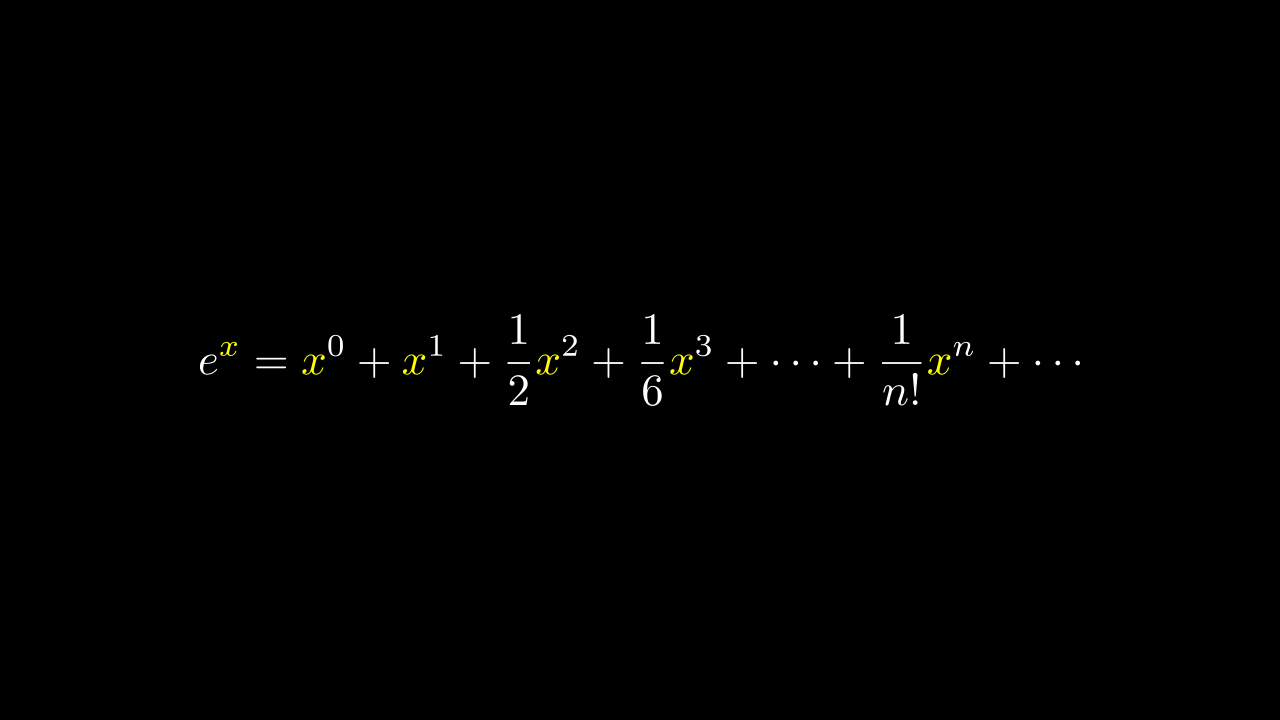

In [55]:
%%manim  -qm -v WARNING CorrectLaTeXSubstringColoring

class CorrectLaTeXSubstringColoring(Scene):
    def construct(self):
        equation = MathTex(
            r"e^x = x^0 + x^1 + \frac{1}{2} x^2 + \frac{1}{6} x^3 + \cdots + \frac{1}{n!} x^n + \cdots",
            substrings_to_isolate="x"
        )
        equation.set_color_by_tex("x", YELLOW)
        self.add(equation)

In [56]:
%%manim  -qm -v WARNING MovingFrameBox

class MovingFrameBox(Scene):
    def construct(self):
        text=MathTex(
            "\\frac{d}{dx}f(x)g(x)=","f(x)\\frac{d}{dx}g(x)","+",
            "g(x)\\frac{d}{dx}f(x)"
        )
        self.play(Write(text))
        framebox1 = SurroundingRectangle(text[1], buff = .1)
        framebox2 = SurroundingRectangle(text[3], buff = .1)
        self.play(
            Create(framebox1),
        )
        self.wait()
        self.play(
            ReplacementTransform(framebox1,framebox2),
        )
        self.wait()

# rajzolás matplotlibbel

Points: [[9, 10], [22, 9], [44, 24], [9, 38], [1, 4], [11, 35], [13, 39], [38, 41], [0, 26], [40, 6]]


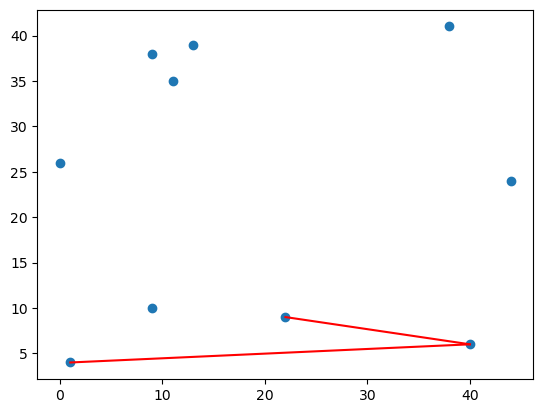

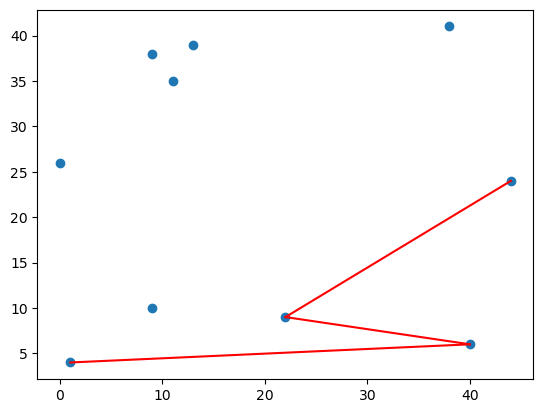

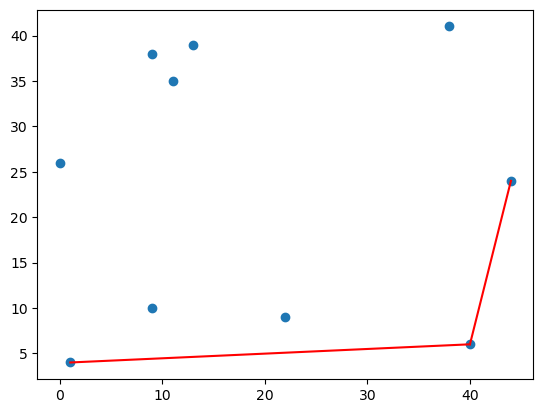

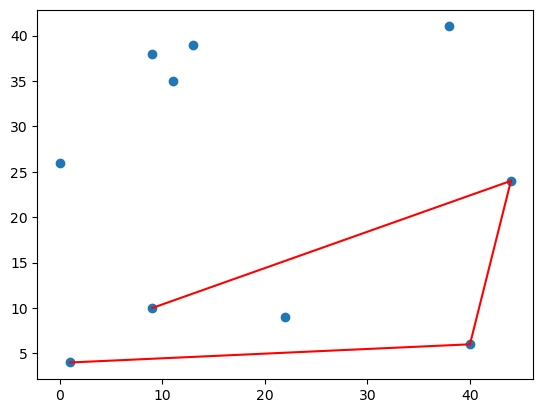

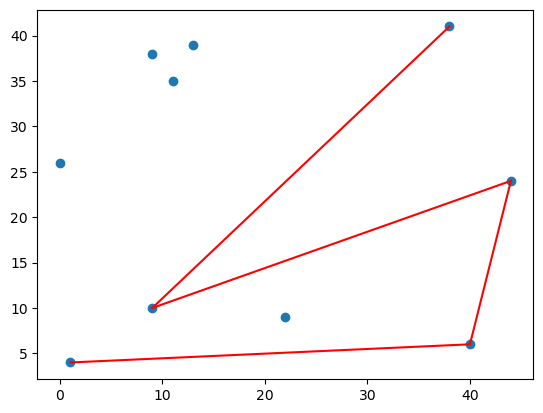

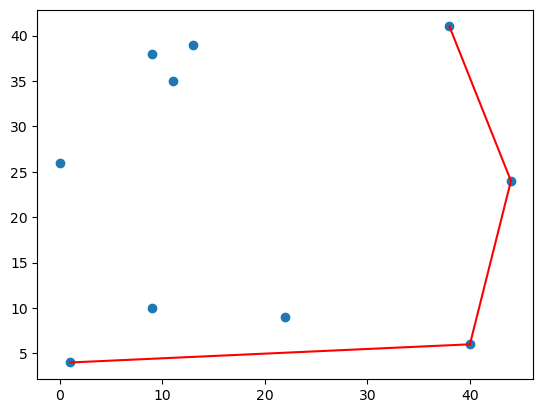

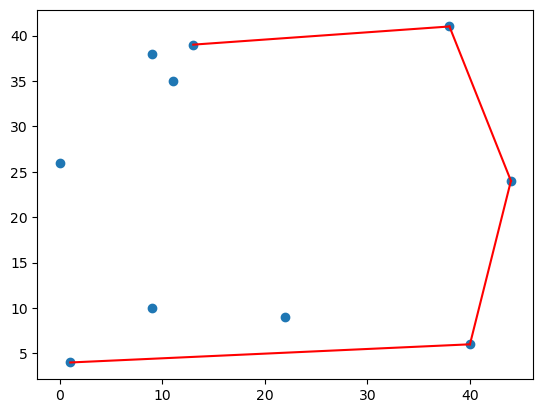

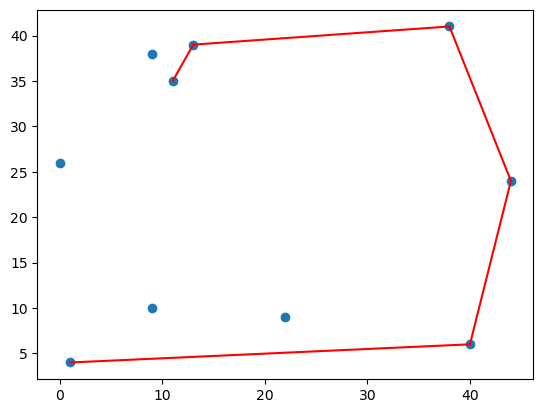

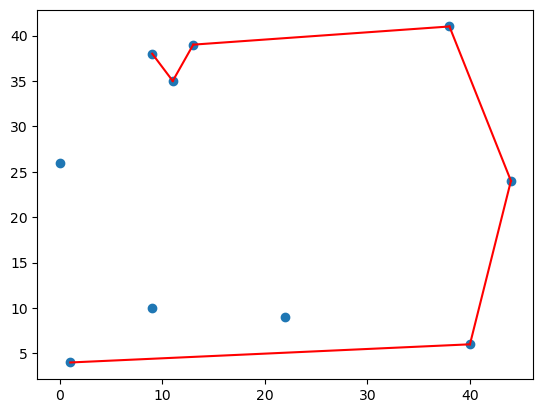

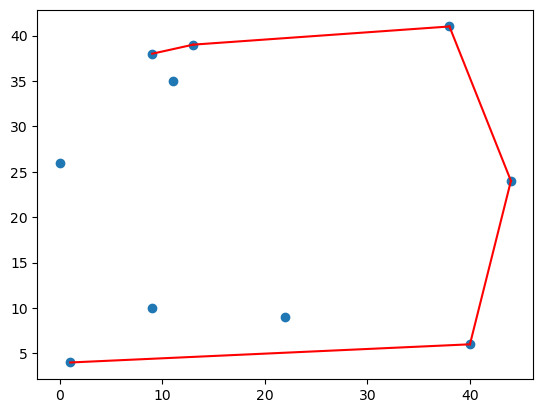

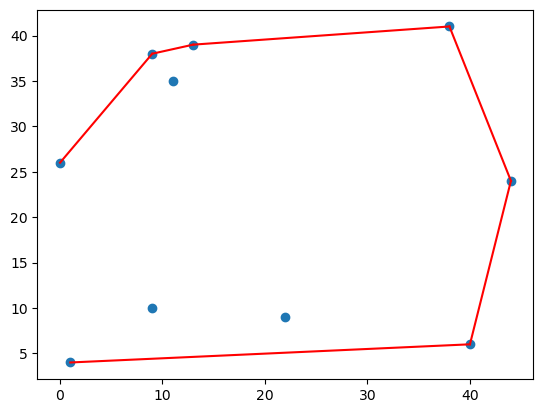

Hull: [[[1, 4], [40, 6], [22, 9]], [[1, 4], [40, 6], [22, 9], [44, 24]], [[1, 4], [40, 6], [44, 24]], [[1, 4], [40, 6], [44, 24], [9, 10]], [[1, 4], [40, 6], [44, 24], [9, 10], [38, 41]], [[1, 4], [40, 6], [44, 24], [38, 41]], [[1, 4], [40, 6], [44, 24], [38, 41], [13, 39]], [[1, 4], [40, 6], [44, 24], [38, 41], [13, 39], [11, 35]], [[1, 4], [40, 6], [44, 24], [38, 41], [13, 39], [11, 35], [9, 38]], [[1, 4], [40, 6], [44, 24], [38, 41], [13, 39], [9, 38]], [[1, 4], [40, 6], [44, 24], [38, 41], [13, 39], [9, 38], [0, 26]]]


In [30]:
# Returns a list of (x,y) coordinates of length 'num_points',
# each x and y coordinate is chosen randomly from the range 
# 'min' up to 'max'.
def create_points(ct,min=0,max=50):
    return [[randint(min,max),randint(min,max)] for _ in range(ct)]

# Creates a scatter plot, input is a list of (x,y) coordinates.
# The second input 'convex_hull' is another list of (x,y) coordinates
# consisting of those points in 'coords' which make up the convex hull,
# if not None, the elements of this list will be used to draw the outer
# boundary (the convex hull surrounding the data points).
def scatter_plot(coords,convex_hull=None):
    xs,ys=zip(*coords) # unzip into x and y coord lists
    plt.scatter(xs,ys) # plot the data points

    if convex_hull!=None:
        # plot the convex hull boundary, extra iteration at
        # the end so that the bounding line wraps around
        #for i in range(1,len(convex_hull)+1):
        for i in range(1,len(convex_hull)):
            if i==len(convex_hull): i=0 # wrap
            c0=convex_hull[i-1]
            c1=convex_hull[i]
            plt.plot((c0[0],c1[0]),(c0[1],c1[1]),'r')
    plt.show()


# Returns the polar angle (radians) from p0 to p1.
# If p1 is None, defaults to replacing it with the
# global variable 'anchor', normally set in the 
# 'graham_scan' function.
def polar_angle(p0,p1=None):
    if p1==None: p1=anchor
    y_span=p0[1]-p1[1]
    x_span=p0[0]-p1[0]
    return atan2(y_span,x_span)


# Returns the euclidean distance from p0 to p1,
# square root is not applied for sake of speed.
# If p1 is None, defaults to replacing it with the
# global variable 'anchor', normally set in the 
# 'graham_scan' function.
def distance(p0,p1=None):
    if p1==None: 
        p1=anchor
    y_span=p0[1]-p1[1]
    x_span=p0[0]-p1[0]
    return y_span**2 + x_span**2


# Returns the determinant of the 3x3 matrix...
# 	[p1(x) p1(y) 1]
#	[p2(x) p2(y) 1]
# 	[p3(x) p3(y) 1]
# If >0 then counter-clockwise
# If <0 then clockwise
# If =0 then collinear
def det(p1,p2,p3):
    return   (p2[0]-p1[0])*(p3[1]-p1[1])-(p2[1]-p1[1])*(p3[0]-p1[0])


# Sorts in order of increasing polar angle from 'anchor' point.
# 'anchor' variable is assumed to be global, set from within 'graham_scan'.
# For any values with equal polar angles, a second sort is applied to
# ensure increasing distance from the 'anchor' point.
def quicksort(a):
    if len(a)<=1: return a
    smaller,equal,larger=[],[],[]
    piv_ang=polar_angle(a[randint(0,len(a)-1)]) # select random pivot
    for pt in a:
        pt_ang=polar_angle(pt) # calculate current point angle
        if   pt_ang<piv_ang:  smaller.append(pt)
        elif pt_ang==piv_ang: equal.append(pt)
        else: 				  larger.append(pt)
    return   quicksort(smaller)+sorted(equal,key=distance)+quicksort(larger)


# Returns the vertices comprising the boundaries of
# convex hull containing all points in the input set. 
# The input 'points' is a list of (x,y) coordinates.
# If 'show_progress' is set to True, the progress in 
# constructing the hull will be plotted on each iteration.
def graham_scan(points,show_progress=False):
    hlista=[]
    global anchor # to be set, (x,y) with smallest y value

    # Find the (x,y) point with the lowest y value,
    # along with its index in the 'points' list. If
    # there are multiple points with the same y value,
    # choose the one with smallest x.
    min_idx=None
    for i,(x,y) in enumerate(points):
        if min_idx==None or y<points[min_idx][1]:
            min_idx=i
        if y==points[min_idx][1] and x<points[min_idx][0]:
            min_idx=i

    # set the global variable 'anchor', used by the
    # 'polar_angle' and 'distance' functions
    anchor=points[min_idx]

    # sort the points by polar angle then delete 
    # the anchor from the sorted list
    sorted_pts=quicksort(points)
    del sorted_pts[sorted_pts.index(anchor)]

    # anchor and point with smallest polar angle will always be on hull
    hull=[anchor,sorted_pts[0]]
    for s in sorted_pts[1:]:
        while det(hull[-2],hull[-1],s)<=0:
            hull.append(s)
            hlista.append(hull.copy())
            scatter_plot(points,hull)
            hull.pop() 
            del hull[-1] # backtrack
            #if len(hull)<2: break
        hull.append(s)
        if show_progress: 
            scatter_plot(points,hull)
            hlista.append(hull.copy())
    return hull, hlista

# For each size in the 'sizes' list, compute the average

pts=create_points(10)
print("Points:",pts)
hull=graham_scan(pts,True)
print("Hull:",hull[1])
#scatter_plot(pts,hull)